In [44]:
import numpy as np
import pandas as pd

## Random pick

### Reversion

In [45]:
max_dd = [np.NaN]*10000
return_dd = [np.NaN]*10000
for i in list(range(0, 10000)):
    df = pd.DataFrame({'result' : np.random.randint(0, 2, 10000), 'pick': np.random.randint(0, 2, 10000)})
    df['mask'] = df['result'] != df['pick']
    df['match'] = df['mask'].cumsum() - df['mask'].cumsum().where(~df['mask']).ffill().fillna(0)
    df['return'] = np.where(df['match'] == 0, (2**(df['match'].shift(1) + 1))/2, -(2**df['match'])/2)
    max_dd[i] = df['match'].max() + 1
    return_dd[i] = df['return'][0:df['return'].argmin()+1].sum()

##### Max DD

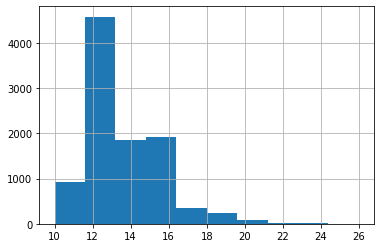

In [49]:
pd.Series(max_dd).hist(bins = 10)

##### Capital after max DD (dropping some maximal values)

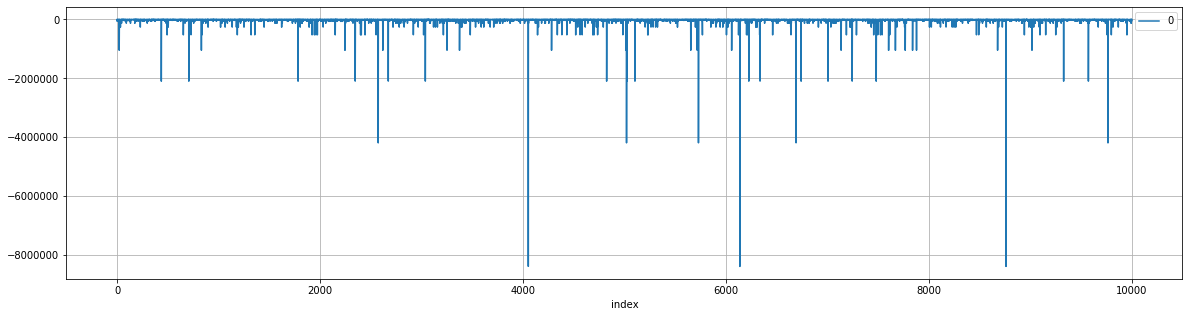

In [48]:
return_dd_trunc = pd.Series(return_dd).sort_values(ascending = False).reset_index()
return_dd_trunc = return_dd_trunc[:-5].set_index('index').sort_index().plot(figsize=(20,5),grid=True)

### Tailgate

In [208]:
# threshold = 3
ret_sum_rd = [np.NaN]*len(list(range(3,9)))
ret_min_rd = [np.NaN]*len(list(range(3,9)))
ret_max_rd = [np.NaN]*len(list(range(3,9)))
bid_rd = [np.NaN]*len(list(range(3,9)))
for threshold in list(range(3,9)):
    ret_sum_th = [np.NaN]*len(list(range(0,1000)))
    ret_min_th = [np.NaN]*len(list(range(0,1000)))
    ret_max_th = [np.NaN]*len(list(range(0,1000)))
    bid_th = [np.NaN]*len(list(range(0,1000)))
    for i in list(range(0,1000)):
        result = 'result_' + str(i)
        rand_pick = 'rand_pick_' + str(i)
        df_rd = pd.DataFrame({result : np.random.randint(0, 2, 10000)})
        df_rd[rand_pick] = np.random.randint(0, 2, 10000)
        df_rd['mask'] = df_rd[result] == df_rd[rand_pick]
        df_rd['R'] = df_rd['mask'].cumsum() - df_rd['mask'].cumsum().where(~df_rd['mask']).ffill().fillna(0)
        df_rd['mask'] = df_rd['mask']*1
        df_rd['strat'] = np.where(df_rd['mask'] == 0, np.NaN, df_rd['R'])
        df_rd['ret'] = np.where( df_rd['strat'] % threshold != 0, 2**((df_rd['strat'] % threshold) - 1), 2**(threshold-1))
        df_rd.loc[ df_rd['R'] == 0, 'ret'] = -1
        df_rd.loc[ (df_rd['R'] == 0) & (0 < df_rd['R'].shift()) & (df_rd['R'].shift() != threshold) & (df_rd['R'].shift()%threshold != 0)& (df_rd['R'].shift()%threshold < threshold), 'ret'] = -2**(df_rd['strat'].shift()%threshold)
        
        ret_sum_th[i] = df_rd['ret'].where(df_rd['ret'] > 0).sum()*0.95 + df_rd['ret'].where(df_rd['ret'] < 0).sum()
#         ret_sum_th.append(ret_sum_tmp)
        
        ret_min_th[i] = df_rd['ret'].cumsum().min()
#         ret_min_th.append(ret_min_tmp)

        ret_max_th[i] = df_rd['ret'][0:df_rd['ret'].argmax()+1].sum()
        
        bid_th[i] = df_rd['ret'].argmax()
        
    ret_sum_rd[threshold - 3] = ret_sum_th
    ret_min_rd[threshold - 3] = ret_min_th
    ret_max_rd[threshold - 3] = ret_max_th
    bid_rd[threshold - 3] = bid_th

(array([ 12.,  38., 135., 176., 233., 180., 134.,  60.,  20.,  12.]),
 array([-3902.05, -3278.96, -2655.87, -2032.78, -1409.69,  -786.6 ,
         -163.51,   459.58,  1082.67,  1705.76,  2328.85]),
 <a list of 10 Patch objects>)

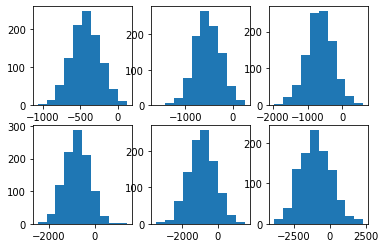

In [212]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 3)
axs[0, 0].hist(pd.Series(ret_sum_rd[0]))
axs[0, 1].hist(pd.Series(ret_sum_rd[1]))
axs[0, 2].hist(pd.Series(ret_sum_rd[2]))
axs[1, 0].hist(pd.Series(ret_sum_rd[3]))
axs[1, 1].hist(pd.Series(ret_sum_rd[4]))
axs[1, 2].hist(pd.Series(ret_sum_rd[5]))

In [220]:
for threshold, value in enumerate(ret_sum_rd):
    print('Bid cutoff {}:'.format(threshold+3), 'Capital: {}'.format(str(pd.Series(ret_sum_rd[threshold]).sum())))

Bid cutoff 3: Capital: -424443.25000000035
Bid cutoff 4: Capital: -526274.6000000004
Bid cutoff 5: Capital: -648082.2000000007
Bid cutoff 6: Capital: -767529.6500000007
Bid cutoff 7: Capital: -890008.9000000007
Bid cutoff 8: Capital: -1009898.7500000007


In [221]:
for threshold, value in enumerate(ret_max_rd):
    print('Stop after max return, bid cutoff {}:'.format(threshold+3), 'Average total bids: {}'.format(str(pd.Series(bid_rd[threshold]).mean())), 'Capital: {}'.format(str(pd.Series(ret_max_rd[threshold]).sum())))

Stop after max return, bid cutoff 3: Average total bids: 12.809 Capital: 120.0
Stop after max return, bid cutoff 4: Average total bids: 28.729 Capital: 226.0
Stop after max return, bid cutoff 5: Average total bids: 62.311 Capital: -778.0
Stop after max return, bid cutoff 6: Average total bids: 122.778 Capital: 1013.0
Stop after max return, bid cutoff 7: Average total bids: 251.214 Capital: 570.0
Stop after max return, bid cutoff 8: Average total bids: 544.531 Capital: -17159.0
